<a target="_blank" href="https://colab.research.google.com/github/phitter-core/phitter-kernel/blob/main/examples/fit_continuous_ncdb.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

# **TUTORIAL: ANALYSIS OF PROBABILITY DISTRIBUTION OF WIND GUSTS IN METEOROLOGICAL DATA**

In [1]:
import pandas
import sys
import os

In [2]:
if os.getenv("COLAB_RELEASE_TAG"):
   !pip install phitter --quiet
else:
   sys.path.append("../")

In [3]:
import phitter

**Load Dataset**

In [4]:
df = pandas.read_csv("https://www.ndbc.noaa.gov/view_text_file.php?filename=41001h1995.txt.gz&dir=data/historical/stdmet/", delim_whitespace=True)
df.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS
0,95,1,1,1,152,7.4,9.1,2.7,12.5,7.9,999,1027.3,17.6,20.6,999.0,99.0
1,95,1,1,2,156,9.1,11.6,2.7,12.5,7.6,999,1026.6,18.0,20.7,999.0,99.0
2,95,1,1,3,170,9.0,11.3,2.6,12.5,7.5,999,1025.9,18.3,21.4,999.0,99.0
3,95,1,1,4,169,10.0,12.4,2.5,11.1,6.8,999,1025.0,18.8,21.4,999.0,99.0
4,95,1,1,5,178,11.1,14.0,2.3,11.1,6.0,999,1024.0,18.8,21.2,999.0,99.0


**Get GST column and clean outiliers**

In [5]:
Q1 = df["GST"].quantile(0.25)
Q3 = df["GST"].quantile(0.75)
IQR = Q3 - Q1

df = df[(df["GST"] >= Q1 - 1.5 * IQR) & (df["GST"] <= Q3 + 1.5 * IQR)]
data = df["GST"].to_numpy()

**Initialize the PHITTER model  and fit the model using 4 workers for better performance**

In [6]:
phi = phitter.Phitter(data=data)
phi.fit(n_workers=4)

**Get best distribution**

In [7]:
phi.best_distribution

{'id': 'weibull',
 'parameters': {'alpha': 2.2093141988724394, 'beta': 10.006600367515215}}

**Summarize**

In [8]:
phi.summarize()

,distribution,sse,parameters,chi_square,kolmogorov_smirnov,anderson_darling
0,weibull,0.000186,"alpha: 2.209, beta: 10.01",✖️,✅,✅
1,burr,0.000190,"A: 114.1, B: 2.211, C: 219.4",✖️,✅,✅
2,generalized_gamma,0.000191,"a: 11.06, d: 2.051, p: 2.485",✖️,✅,✅
3,beta,0.000194,"alpha: 2.464, beta: 4.881, A: 0.1682, B: 26.09",✖️,✅,✅
4,burr_4p,0.000195,"A: 114.1, B: 2.211, C: 219.4, loc: 0.03258",✖️,✅,✅
5,rice,0.000212,"v: 6.614, sigma: 5.135",✖️,✅,✅
6,weibull_3p,0.000224,"alpha: 2.347, loc: -0.4928, beta: 10.56",✖️,✅,✅
7,johnson_sb,0.000252,"xi: -0.7045, lambda: 25.63, gamma: 0.7415, del...",✖️,✅,✅
8,rayleigh,0.000388,"gamma: 0.758, sigma: 6.466",✖️,✅,✖️
9,pert,0.000266,"a: 0.199, b: 7.321, c: 23.57",✖️,✖️,✖️


**Get top 10 distrbutions**

In [8]:
phi.df_sorted_distributions_sse.head(10)

distribution passed       sse  \
                                        
0            weibull      ✅  0.000186   
1               burr      ✅  0.000190   
2  generalized_gamma      ✅  0.000191   
3               beta      ✅  0.000194   
4            burr_4p      ✅  0.000195   
5               rice      ✅  0.000212   
6         weibull_3p      ✅  0.000224   
7         johnson_sb      ✅  0.000252   
8           rayleigh      ✅  0.000388   
9               pert     ✖️  0.000266   

                                          parameters     chi_square  \
                                                     test_statistic   
0                          alpha: 2.209, beta: 10.01      46.152236   
1                       A: 114.1, B: 2.211, C: 219.4      48.143424   
2                       a: 11.06, d: 2.051, p: 2.485      54.899940   
3     alpha: 2.464, beta: 4.881, A: 0.1682, B: 26.09      48.442024   
4         A: 114.1, B: 2.211, C: 219.4, loc: 0.03258      47.553863   
5                             v: 6.614, sigma: 5.135      60.805665   
6            alpha: 2.347, loc: -0.4928, beta: 10.56      60.927302   
7  xi: -0.7045, lambda: 25.63, gamma: 0.7415, del...      58.803077   
8                         gamma: 0.758, sigma: 6.466            NaN   
9                       a: 0.199, b: 7.321, c: 23.57      71.579654   

                                        kolmogorov_smirnov                 \
  critical_value       p_value rejected     test_statistic critical_value   
0      26.296228  9.222297e-05     True           0.011630       0.016292   
1      24.995790  2.411080e-05     True           0.009697       0.016292   
2      24.995790  1.856319e-06     True           0.011547       0.016292   
3      23.684791  1.110509e-05     True           0.011735       0.016292   
4      23.684791  1.557844e-05     True           0.012515       0.016292   
5      26.296228  3.826762e-07     True           0.012606       0.016292   
6      24.995790  1.745966e-07     True           0.014131       0.016292   
7      23.684791  1.900144e-07     True           0.014215       0.016292   
8            NaN           NaN     None           0.016064       0.016292   
9      24.995790  2.333379e-09     True           0.017635       0.016292   

                     anderson_darling                                    
    p_value rejected   test_statistic critical_value   p_value rejected  
0  0.303488    False         1.162231       2.492262  0.282359    False  
1  0.529364    False         1.372952       2.492262  0.209949    False  
2  0.311670    False         1.549415       2.492262  0.165102    False  
3  0.293440    False         0.855043       2.492262  0.442978    False  
4  0.226092    False         1.306915       2.492262  0.230117    False  
5  0.219025    False         1.990571       2.492262  0.092943    False  
6  0.124519    False         2.113416       2.492262  0.079638    False  
7  0.120457    False         1.384476       2.492262  0.206636    False  
8  0.055398    False         4.783752       2.492262  0.003638     True  
9  0.026577     True         2.929044       2.492262  0.029735     True

**Get parameters by `id_distribution`**

In [9]:
phi.get_parameters("weibull")

{'alpha': 2.2093141988724394, 'beta': 10.006600367515215}

**Get sum squared error by `id_distribution`**

In [10]:
phi.get_sse("weibull")

0.00018632069586130065

**Get results kolmogorov smirnov test by `id_distribution`**

In [11]:
phi.get_test_kolmogorov_smirnov("weibull")

{'test_statistic': 0.011630483573838557,
 'critical_value': 0.01629225420391433,
 'p_value': 0.30348789291495115,
 'rejected': False}

**Plot a histogram of the dataset values to visualize the distribution**

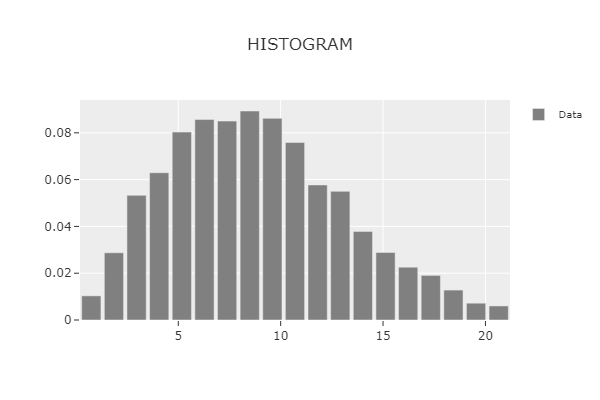

In [12]:
phi.plot_histogram()

**Plot histogram and compare with N distributions**

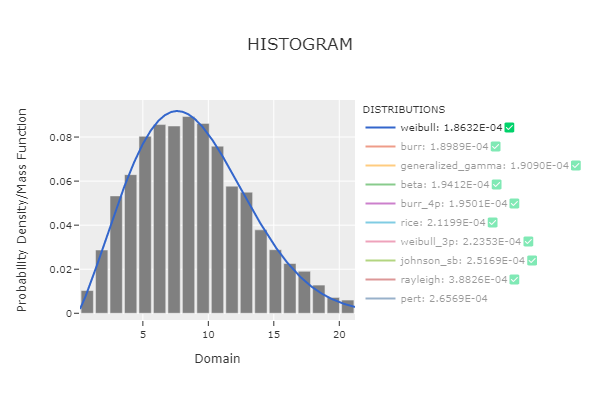

In [13]:
phi.plot_histogram_distributions()

**Plot the histogram along with the `id_distribution` distribution curve for comparison**

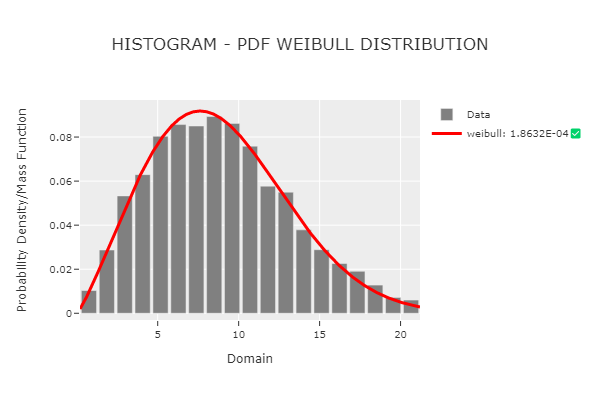

In [14]:
phi.plot_distribution("weibull")

**Generate an empirical cumulative distribution function (ECDF) plot for the data**

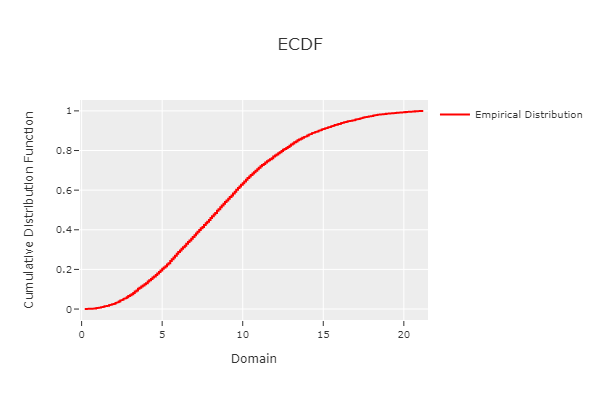

In [15]:
phi.plot_ecdf()

**Plot the ECDF to visualize how closely the dataset values follow a `id_distribution`**

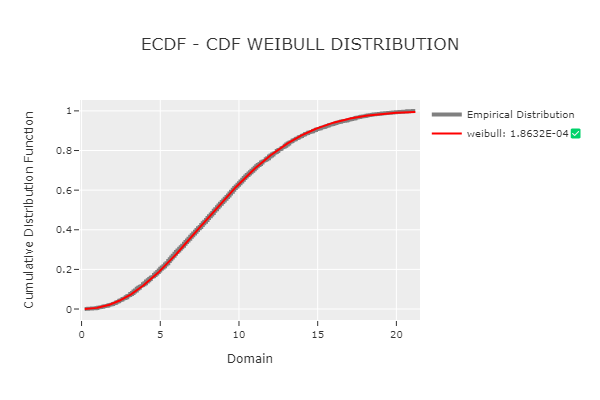

In [16]:
phi.plot_ecdf_distribution("weibull")

**Create a QQ plot for the `id_distribution` to check the quantiles against a `id_distribution`**

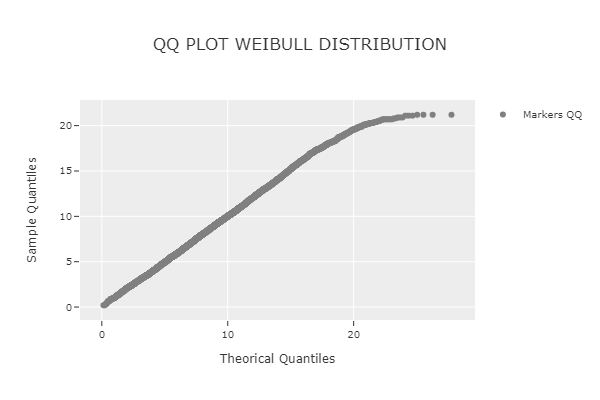

In [17]:
phi.qq_plot("weibull")

**Generate a QQ plot with a regression line for the `id_distribution` to assess normality through quantile comparisons**

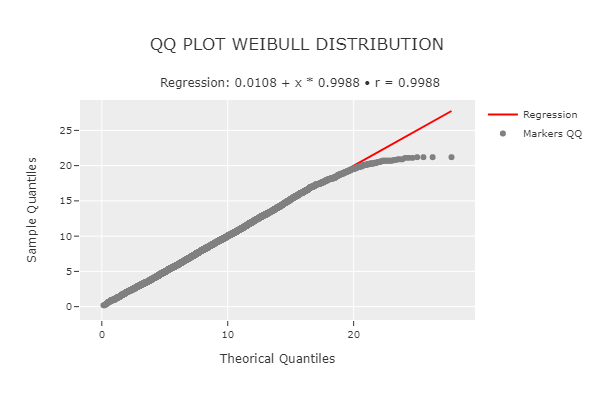

In [18]:
phi.qq_plot_regression("weibull")